In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import time
from scipy.stats import linregress
import json
import datetime


# Import API key
from config import weather_api_key

# Installed & imported citipy to look for nearest city with geocoordinates
from citipy import citipy 

# Create variable & csv path to cities
worldcities_to_load = "../../output_data/cities.csv"
worldcities = pd.read_csv(worldcities_to_load)
worldcities

#Range of latitude and longitude
latitude = (-90,90)
longitude = (-180,180)


# Define URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Define a count for the number of pass throughs
count_one = 0
set_one = 1

In [2]:
# List for holding latitudes/longitudes and cities
lats_longs = []
cities = []

# Create a set of random latitude and longitude combinations
xlats = np.random.uniform(low=-90.000, high=90.000, size=1690)
ylngs = np.random.uniform(low=-180.000, high=180.000, size=1690)
xlats_ylongs = zip(xlats, ylngs)

# Identify nearest city for each lat, lng combination
for xlats_ylongs in xlats_ylongs:
    citys = citipy.nearest_city(xlats_ylongs[0], xlats_ylongs[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if citys not in cities:
        cities.append(citys)

# Print the city count to confirm sufficient count generated
len(cities)

655

In [3]:
# Making lists for the dataframe
count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data.
sets = 0 # counter to count the number of call sets
index = 0 # index fo
#Get current time
t0 =time.time()
citys_2 = []
xlats = []
ylongs = []
cloudiness = []
dates = []
humidities = []
max_temps = []
wind_speeds = []
countries = []


# Creating a for loop for the dataframe columns
for city in worldcities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f"{url}appid={weather_api_key}&units={units}&q=")
        city_stats = query_url.get_current(city, **settings)
        worldcities.set_value(index, "City", city_stats["name"])
        worldcities.set_value(index, "Cloudiness", city_stats("clouds.all"))
        worldcities.set_value(index, "Country", city_stats("sys.country"))
        worldcities.set_value(index, "Date", city_stats("dt"))
        worldcities.set_value(index, "Max Temp", city_stats("main.temp_max"))
        worldcities.set_value(index, "Wind Speed", city_stats("wind.speed"))
        worldcities.set_value(index, "Lat", city_stats("coord.lat"))
        worldcities.set_value(index, "Lng", city_stats("coord.lon"))
        worldcities.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("End of Stats Loop")
print(f'Could not get data for {err} cities')
print("------------------------------")
print("Retrieving Data Complete ")
print("------------------------------")


Processing Record 1 of Set 0 | City_ID
http://api.openweathermap.org/data/2.5/weather?appid=50d6490911019c6cacc735710f16ebcc&units=metric&q=
'str' object has no attribute 'get_current'
Processing Record 2 of Set 0 | City
http://api.openweathermap.org/data/2.5/weather?appid=50d6490911019c6cacc735710f16ebcc&units=metric&q=
'str' object has no attribute 'get_current'
Processing Record 3 of Set 0 | Cloudiness
http://api.openweathermap.org/data/2.5/weather?appid=50d6490911019c6cacc735710f16ebcc&units=metric&q=
'str' object has no attribute 'get_current'
Processing Record 4 of Set 0 | Country
http://api.openweathermap.org/data/2.5/weather?appid=50d6490911019c6cacc735710f16ebcc&units=metric&q=
'str' object has no attribute 'get_current'
Processing Record 5 of Set 0 | Date
http://api.openweathermap.org/data/2.5/weather?appid=50d6490911019c6cacc735710f16ebcc&units=metric&q=
'str' object has no attribute 'get_current'
Processing Record 6 of Set 0 | Humidity
http://api.openweathermap.org/data/2.5

In [4]:
worldcities.count()

City_ID       548
City          548
Cloudiness    548
Country       544
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [5]:
worldcities.to_csv("worldcities.csv", encoding='utf-8', index=False)
worldcities.head(10)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
5,5,atuona,78,PF,1558378755,76,-9.80,-139.03,81.96,16.49
6,6,flinders,0,AU,1558378755,62,-34.58,150.85,60.01,11.41
7,7,opuwo,0,NaN,1558378523,23,-18.06,13.84,72.06,5.44
8,8,tiksi,95,RU,1558378756,88,71.64,128.87,14.10,15.70
9,9,pushkinskiye gory,6,RU,1558378756,70,57.02,28.91,65.04,6.93


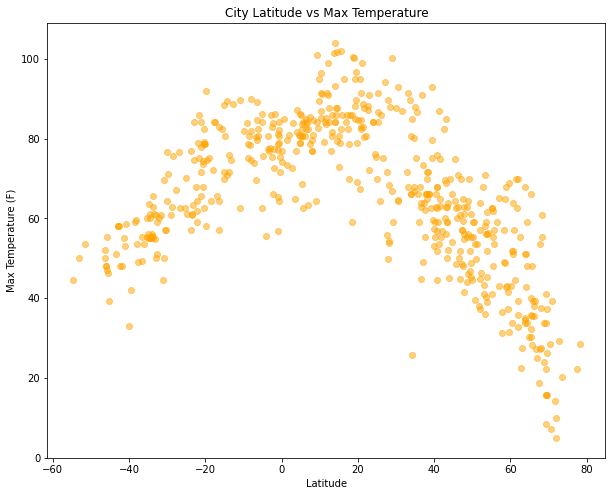

In [6]:
#Latitude vs Temperature plot

plt.figure(figsize=(10,8))
#sns.set()
plt.scatter(worldcities["Lat"], worldcities["Max Temp"], color='orange', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature')
plt.savefig("LatVsTemp.png")
plt.show()

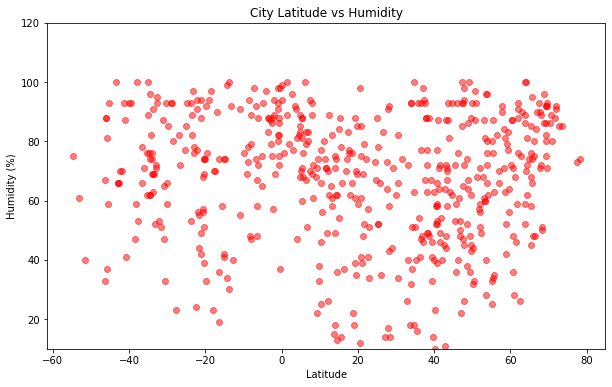

In [7]:
# Latitude vs Humidity

plt.figure(figsize=(10,6))
plt.scatter(worldcities["Lat"], worldcities["Humidity"], color='red', alpha=0.5)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
plt.savefig("LatVsHumidity.png")
plt.show()

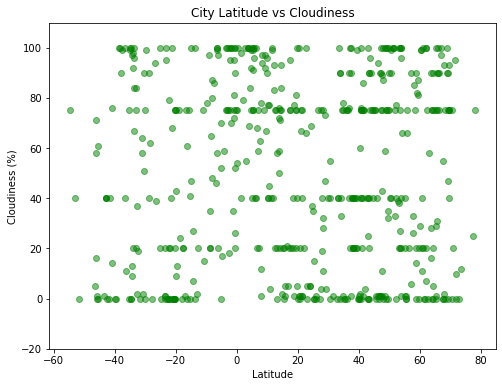

In [8]:
# Latitude vs Cloudiness Plot

plt.figure(figsize=(8,6))
plt.scatter(worldcities["Lat"], worldcities["Cloudiness"], color='green', alpha=0.5)
plt.ylim(-20,(worldcities["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')
plt.savefig("LatVsCloudiness.png")
plt.show()

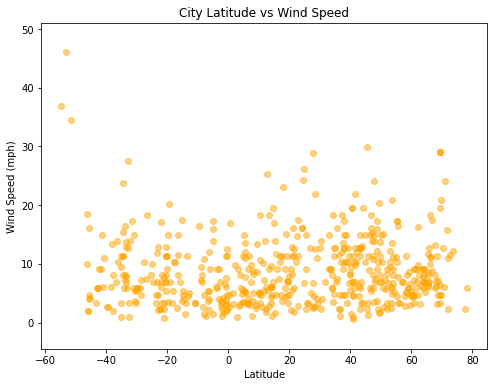

In [12]:
# Latitude vs Wind Speed


plt.figure(figsize=(8,6))
plt.scatter(worldcities["Lat"], worldcities["Wind Speed"], color='orange', alpha=0.5)
plt.ylim((worldcities["Wind Speed"].min()-5),(worldcities["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed')
plt.savefig("LatVsWind.png")
plt.show()


In [13]:
worldcities.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = worldcities.loc[pd.to_numeric(worldcities["Lat"]).astype(float) > 0, :]
southern_df = worldcities.loc[pd.to_numeric(worldcities["Lat"]).astype(float) < 0, :]

Regression line equation is: y = -0.22x + 69.28
The r-squared is: -0.39360633693821995
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.



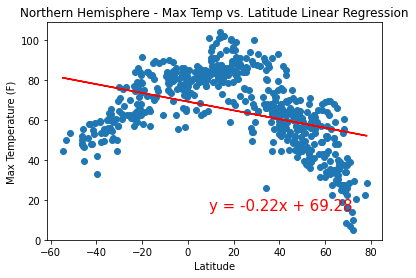

In [30]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression¶
x_values = pd.to_numeric(worldcities['Lat']).astype(float)
y_values = pd.to_numeric(worldcities['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(9,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
print("")
plt.show()

Regression line equation is: y = -0.22x + 69.28
The r-squared is: -0.39360633693821995
The regression displays a negative correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.



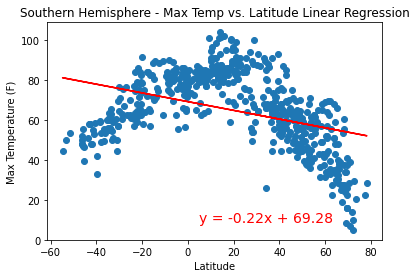

In [31]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression¶
x_values = pd.to_numeric(worldcities['Lat']).astype(float)
y_values = pd.to_numeric(worldcities['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,9),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
print("")
plt.show()

Regression line equation is: y = -0.05x + 68.67
The r-squared is: -0.07173486201769252
The regression displays a correlation between the data sets.



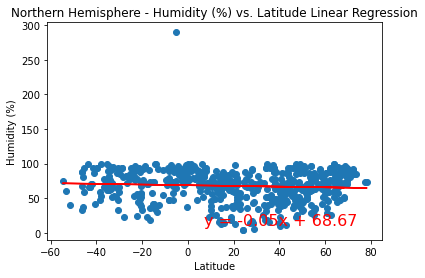

In [32]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression¶

x_values = pd.to_numeric(worldcities['Lat']).astype(float)
y_values = pd.to_numeric(worldcities['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,11),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a correlation between the data sets.") 
print("")
plt.show()


Regression line equation is: y = -0.05x + 68.67
The r-squared is: -0.07173486201769252
The regression displays a correlation between the data sets.



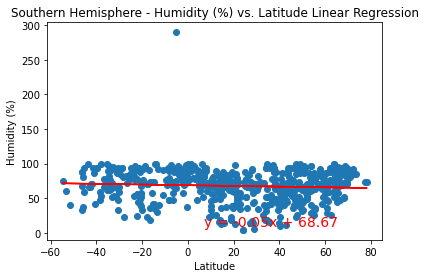

In [33]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = pd.to_numeric(worldcities['Lat']).astype(float)
y_values = pd.to_numeric(worldcities['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,9),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a correlation between the data sets.") 
print("")
plt.show()

Regression line equation is: y = 0.01x + 49.12
The r-squared is: 0.01322514546848101
The regression does not display much of a correlation between the data sets.



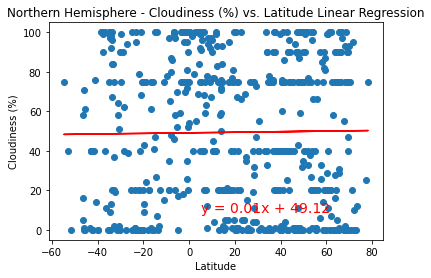

In [34]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression¶

x_values = pd.to_numeric(worldcities['Lat']).astype(float)
y_values = pd.to_numeric(worldcities['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,9),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
print("")
plt.show()

Regression line equation is: y = 0.01x + 49.12
The r-squared is: 0.01322514546848101
The regression does not display much of a correlation between the data sets.



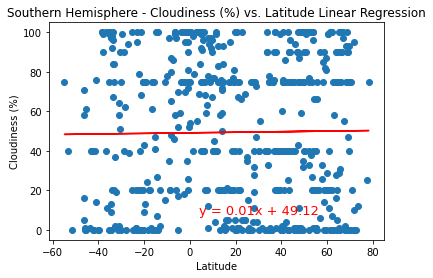

In [36]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression¶
x_values = pd.to_numeric(worldcities['Lat']).astype(float)
y_values = pd.to_numeric(worldcities['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,8),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
print("")
plt.show()

Regression line equation is: y = 0.01x + 8.52
The r-squared is: 0.04482587031469761
The regression is low, it does not display much of a correlation between the data sets.



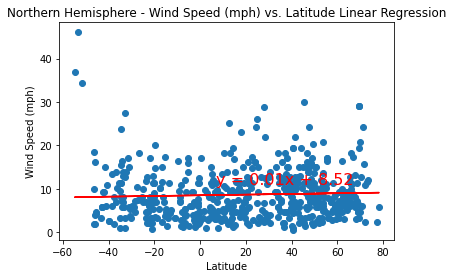

In [38]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression¶

x_values = pd.to_numeric(worldcities['Lat']).astype(float)
y_values = pd.to_numeric(worldcities['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,11),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression is low, it does not display much of a correlation between the data sets.")
print("")
plt.show()

Regression line equation is: y = -0.15x + 4.91
The r-squared is: -0.322483077139538
The regression does not display much of a correlation between the data sets.



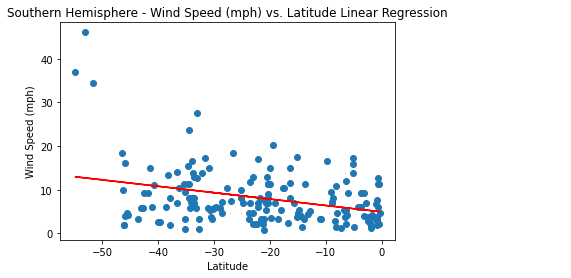

In [40]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression¶
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,11),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
print("")
plt.show()
